In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def brownian_motion(t, n):
    # Générer n étapes aléatoires
    dt = t / n
    increments = np.random.normal(0, np.sqrt(dt), n)
    
    # Calculer les valeurs du processus de Wiener
    brownian_path = np.cumsum(increments)
    
    # Ajouter la condition initiale pour commencer à zéro
    brownian_path = np.insert(brownian_path, 0, 0)
    
    # Générer le vecteur de temps
    time_vector = np.linspace(0, t, n+1)
    
    return time_vector, brownian_path

In [17]:
def eye_motion(t, n, D=1, D_vel = 0.01, p_left=.5, p_right=.5, sac_interval=200):
    # Générer n étapes aléatoires
    dt = t / n
    rnd = np.random.normal(0, np.sqrt(dt), n)
    increments = D * rnd
    vel_increments = D_vel * rnd
    
    # Générer le vecteur de temps
    time_vector = np.linspace(0, t, n+1)
    # Ajouter la condition initiale pour commencer à zéro
    brownian_vel = np.zeros_like(time_vector)
    brownian_path = np.zeros_like(time_vector)
    saccades=[]
    
    
    # Calculer les valeurs du processus de Wiener
    for (i,tau) in enumerate(time_vector[1:]):
        #print(brownian_path[i*50:(i+1)*50].shape)
        saccades += [[tau, 0]]
        if brownian_path[i-1] > D/10:
            if np.random.rand() < (p_right/sac_interval):
                brownian_vel[i-1] = 0
                brownian_path[i-1] = 0
                saccades[-1][1] = 1
        elif brownian_path[i-1] < -D/10:
            if np.random.rand() < (p_left/sac_interval):
                brownian_vel[i-1] = 0
                brownian_path[i-1] = 0
                saccades[-1][1] = 1
        brownian_vel[i] = brownian_vel[i-1] + vel_increments[i]   
        brownian_path[i] = brownian_path[i-1] + 0*increments[i]  + brownian_vel[i]
            
    return time_vector, brownian_vel, brownian_path, saccades

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


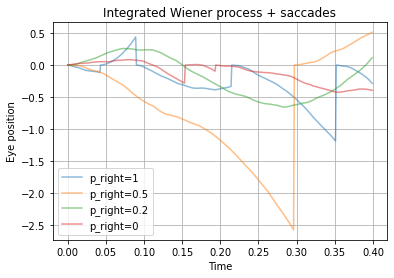

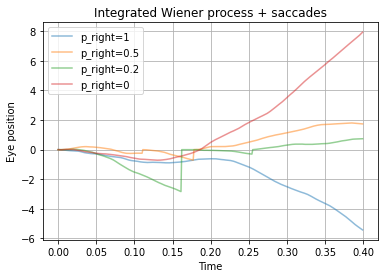

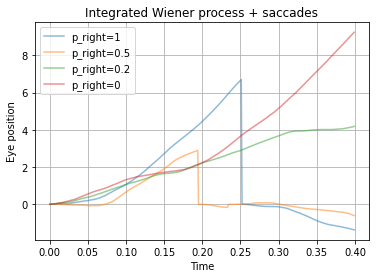

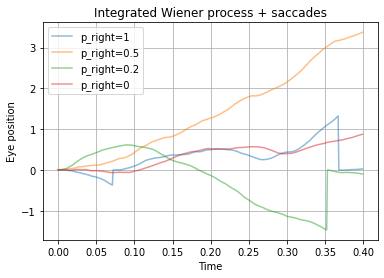

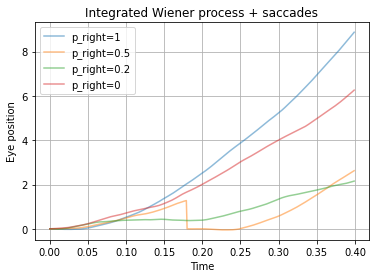

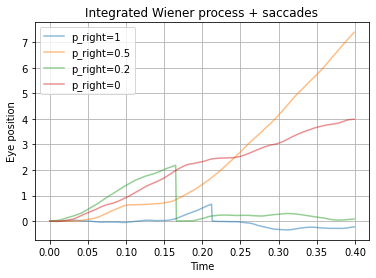

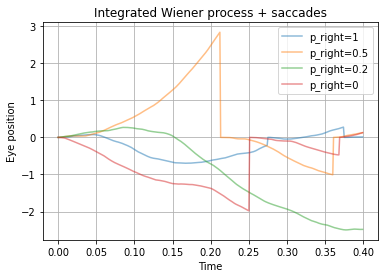

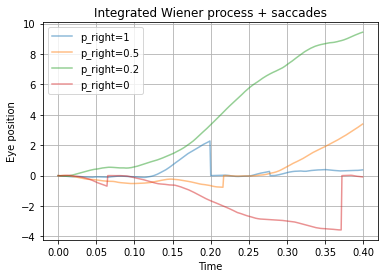

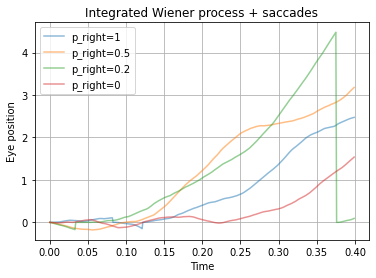

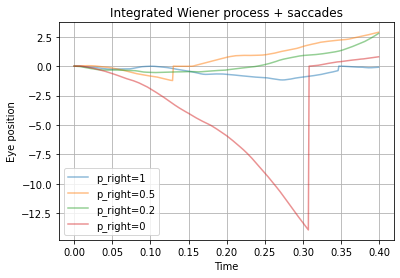

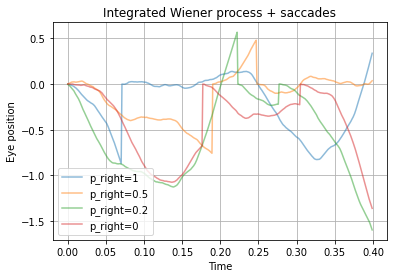

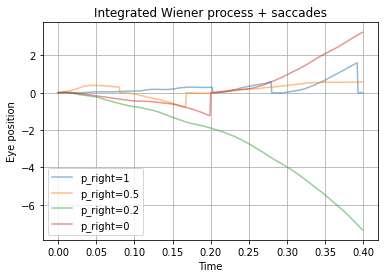

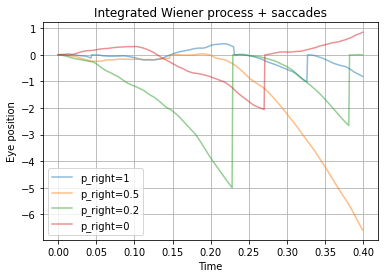

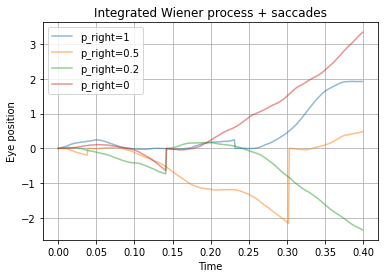

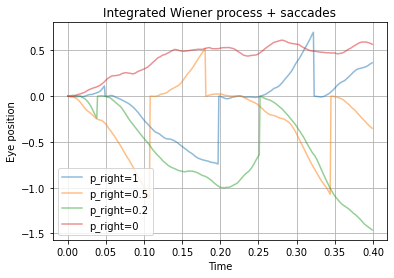

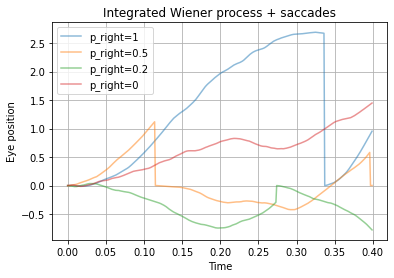

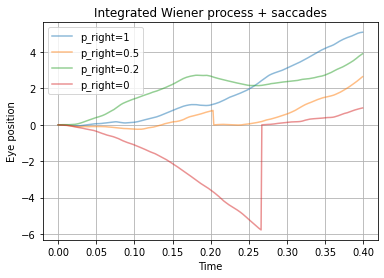

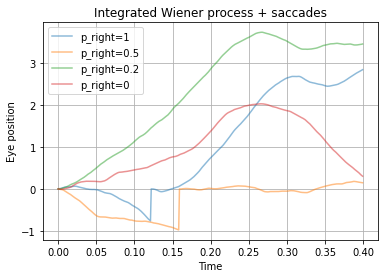

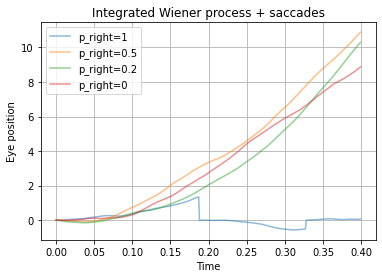

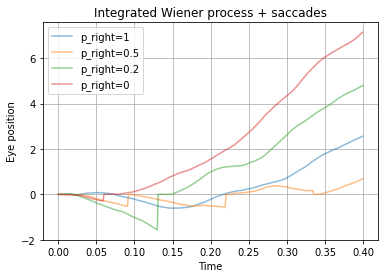

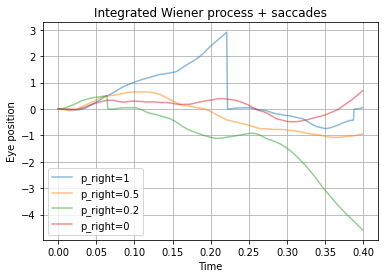

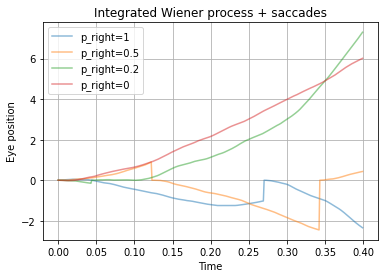

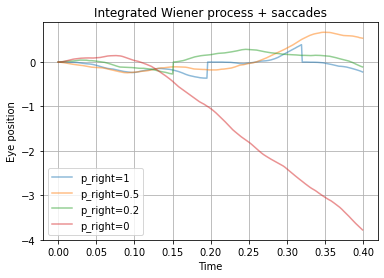

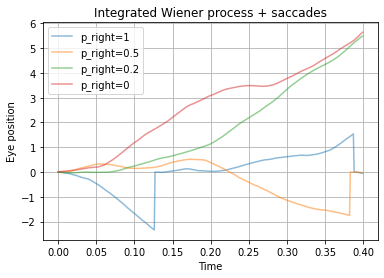

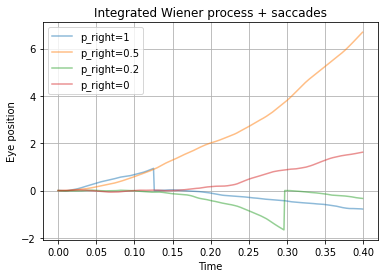

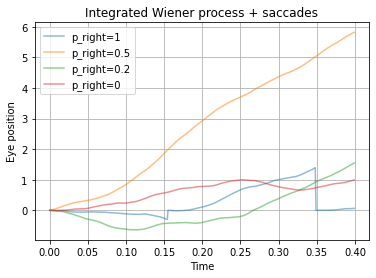

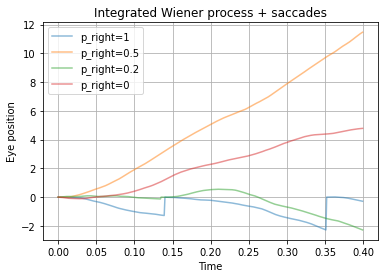

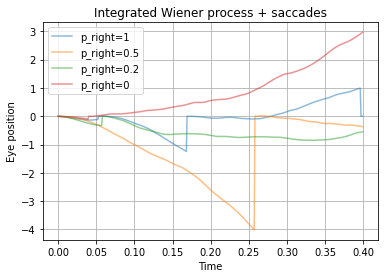

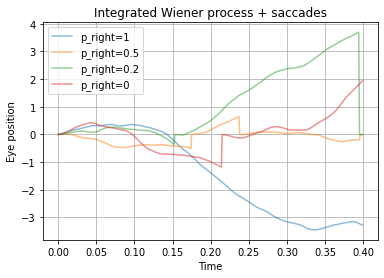

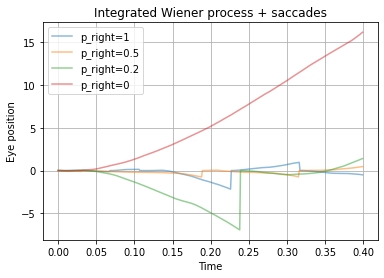

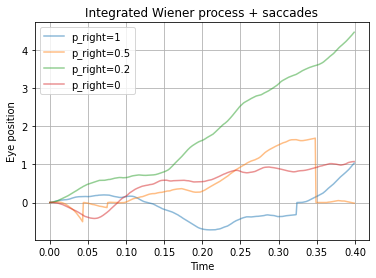

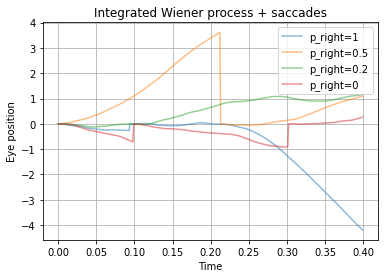

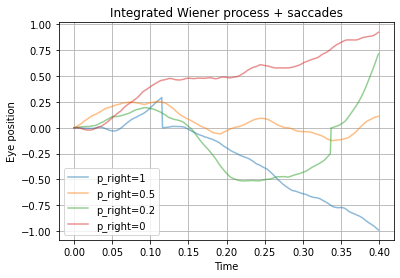

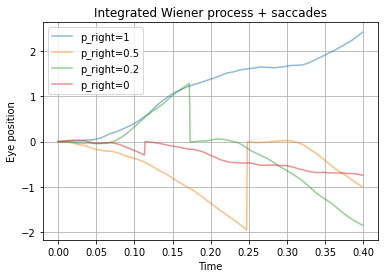

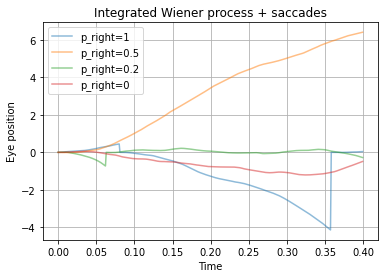

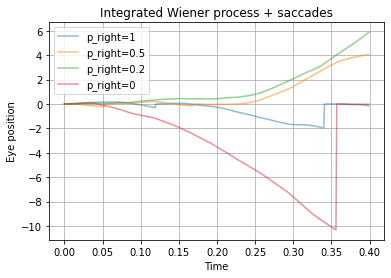

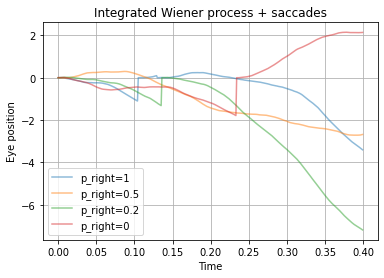

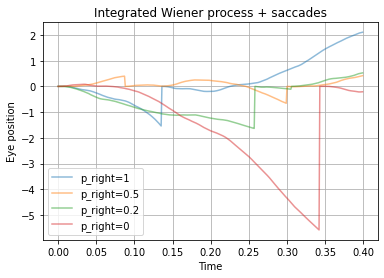

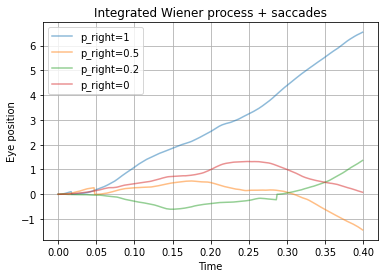

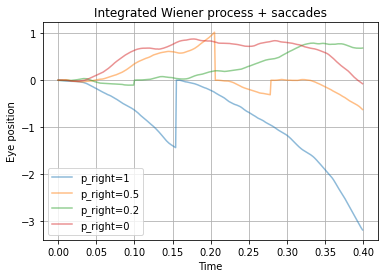

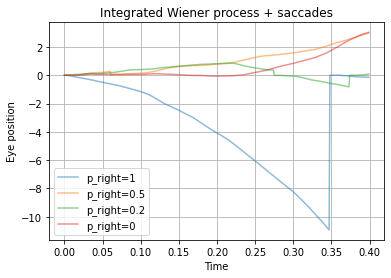

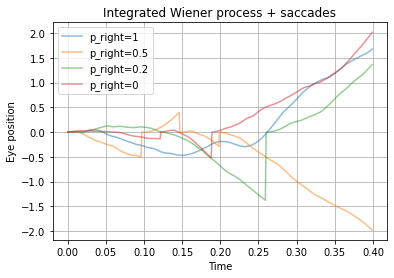

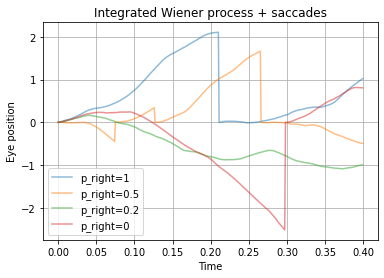

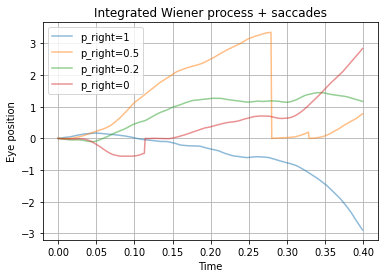

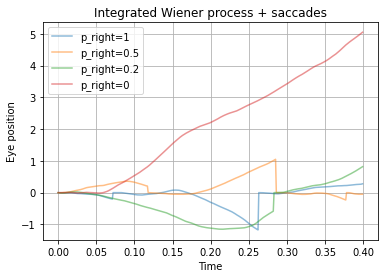

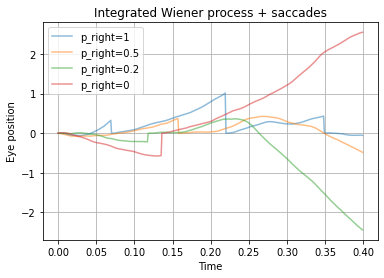

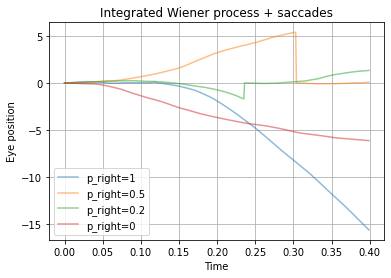

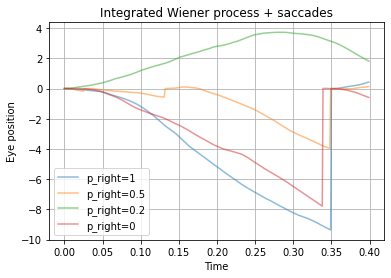

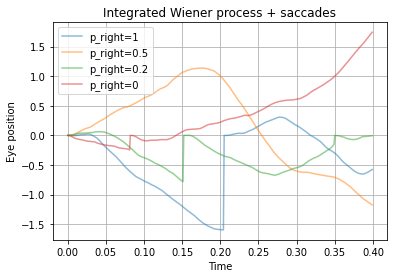

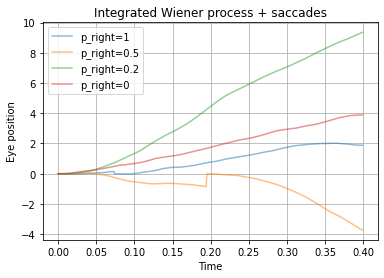

In [161]:
# Spécifiez la durée t et le nombre d'étapes n
t = 0.4  # Durée
n = int(t * 1000)  # Nombre d'étapes

p_right_vals = [1, .5, .2, 0]
mem_eye_pos = {}
mem_eye_velo = {}
motion_sample = {}
subj = {}
n_subj = 50

for i_subj in range(n_subj):
    subj[i_subj] = .02 + np.random.rand() * .04
for i_subj in subj:
    plt.figure()
    mem_eye_pos[i_subj] = {}
    mem_eye_velo[i_subj] = {}
    motion_sample[i_subj] = {}
    for p_right in p_right_vals:
        #print(f"p_right={p_right}")
        mem_eye_pos[i_subj][p_right] = []
        mem_eye_velo[i_subj][p_right] = []
        for i in range(100):

            time, brownian_vel, brownian_path, saccades = eye_motion(t, n, D=1, D_vel=subj[i_subj], p_left=1, p_right=p_right, sac_interval=200)
            brownian = brownian_path 
            #brownian_velo = brownian_vel
            # Afficher le processus de Wiener

            mem_eye_pos[i_subj][p_right] += [brownian_path[-2]]
            mem_eye_velo[i_subj][p_right] += [brownian_vel[-2]]
        motion_sample[i_subj][p_right] = brownian
        plt.plot(time[:-1], brownian[:-1], label=f'p_right={p_right}', alpha=.5)
        #plt.plot(time, brownian_velo, label=f'p_right={p_right}', alpha=.5)
        #plt.plot(time, brownian+brownian_velo, label=f'p_right={p_right}', alpha=.5)
    plt.xlabel('Time')
    plt.ylabel('Eye position')
    plt.title('Integrated Wiener process + saccades')
    plt.grid(True)
    plt.legend()


In [162]:
pos_data = {}
mean_pos = {}
std_pos = {}
for p_right in p_right_vals: 
    pos_data[p_right] = []
    mean_pos[p_right] = []
    std_pos[p_right] = []
    for i_subj in subj:
        pos_data[p_right].extend(mem_eye_pos[i_subj][p_right])
        mean_pos[p_right].append(np.mean(mem_eye_pos[i_subj][p_right]))
        std_pos[p_right].append(np.std(mem_eye_pos[i_subj][p_right]))        

In [163]:
velo_data = {}
mean_velo = {}
std_velo = {}
for p_right in p_right_vals: 
    velo_data[p_right] = []
    mean_velo[p_right] = []
    std_velo[p_right] = []
    for i_subj in subj:
        velo_data[p_right].extend(mem_eye_velo[i_subj][p_right])
        mean_velo[p_right].append(np.mean(mem_eye_velo[i_subj][p_right]))
        std_velo[p_right].append(np.std(mem_eye_velo[i_subj][p_right]))        

In [164]:
np.array(velo_data[p_right]).shape

(5000,)

Text(0.5, 1.0, 'mean anticipatory position')

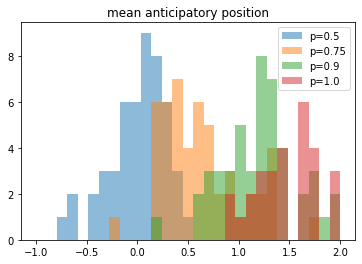

In [165]:
for p_right in p_right_vals:
    plt.hist(mean_pos[p_right], bins = np.linspace(-1,2,30), alpha=.5, label=f'p={0.5 + (1-p_right)/2}')
plt.legend()
plt.title('mean anticipatory position')

Text(0.5, 1.0, 'std anticipatory position')

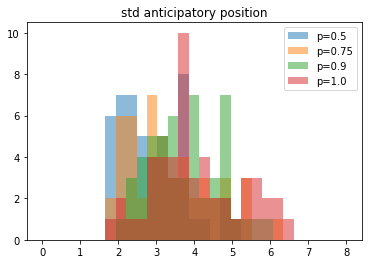

In [166]:
for p_right in p_right_vals:
    plt.hist(std_pos[p_right], bins = np.linspace(0,8,30), alpha=.5, label=f'p={0.5 + (1-p_right)/2}')
plt.legend()
plt.title('std anticipatory position')

Text(0.5, 1.0, 'mean anticipatory velocity')

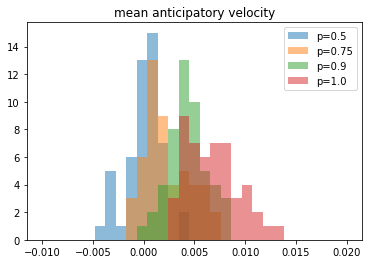

In [167]:
for p_right in p_right_vals:
    plt.hist(mean_velo[p_right], bins = np.linspace(-.01,.02,30), alpha=.5, label=f'p={0.5 + (1-p_right)/2}')
plt.legend()
plt.title('mean anticipatory velocity')

Text(0.5, 1.0, 'std anticipatory velocity')

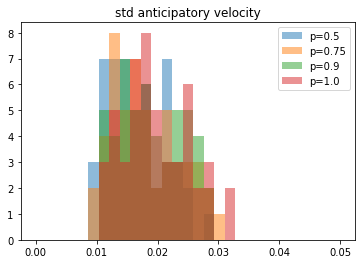

In [168]:
for p_right in p_right_vals:
    plt.hist(std_velo[p_right], bins = np.linspace(0,0.05,30), alpha=.5, label=f'p={0.5 + (1-p_right)/2}')
plt.legend()
plt.title('std anticipatory velocity')

Text(0.5, 1.0, 'Anticipatory position mean')

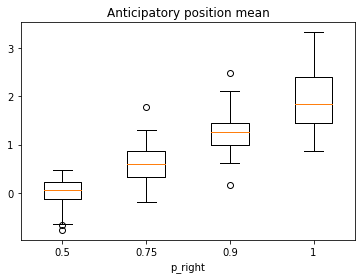

In [169]:
_ = plt.boxplot( (mean_pos[1], mean_pos[.5], mean_pos[.2], mean_pos[0]), labels=(.5, .75, .9, 1))
plt.xlabel('p_right')
plt.title('Anticipatory position mean')

Text(0.5, 1.0, 'Anticipatory position std')

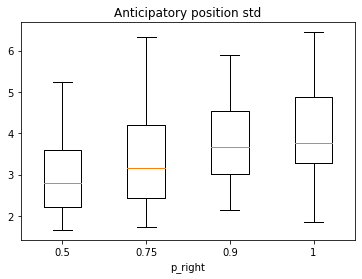

In [170]:
_ = plt.boxplot( (std_pos[1], std_pos[.5], std_pos[.2], std_pos[0]), labels=(.5, .75, .9, 1))
plt.xlabel('p_right')
plt.title('Anticipatory position std')

Text(0.5, 1.0, 'Anticipatory velocity mean')

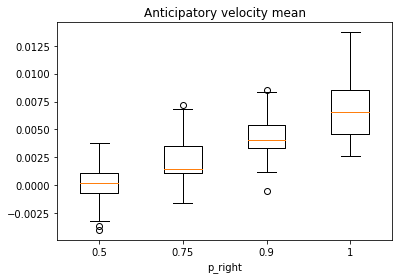

In [171]:
_ = plt.boxplot( (mean_velo[1], mean_velo[.5], mean_velo[.2], mean_velo[0]), labels=(.5, .75, .9, 1))
plt.xlabel('p_right')
plt.title('Anticipatory velocity mean')

Text(0.5, 1.0, 'Anticipatory velocity std')

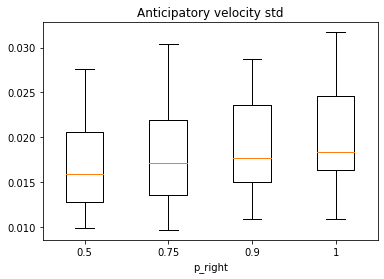

In [172]:
_ = plt.boxplot( (std_velo[1], std_velo[.5], std_velo[.2], std_velo[0]), labels=(.5, .75, .9, 1))
plt.xlabel('p_right')
plt.title('Anticipatory velocity std')

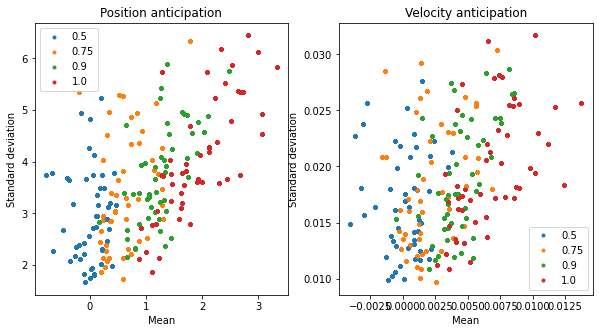

In [173]:
color={1:'tab:blue',
      .5:'tab:orange',
      .2:'tab:green',
       0:'tab:red'}

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

for i_subj in subj:
    for p_right in p_right_vals:
        if i_subj == 0:
            plt.plot(mean_pos[p_right],std_pos[p_right],'.',c=color[p_right], label=0.5 + (1-p_right)/2)
        else:
            plt.plot(mean_pos[p_right],std_pos[p_right],'.',c=color[p_right])
        
plt.xlabel('Mean')
plt.ylabel('Standard deviation')
plt.title('Position anticipation')
plt.legend()

plt.subplot(1,2,2)

for i_subj in subj:
    for p_right in p_right_vals:
        if i_subj == 0:
            plt.plot(mean_velo[p_right],std_velo[p_right],'.',c=color[p_right], label=0.5 + (1-p_right)/2)
        else:
            plt.plot(mean_velo[p_right],std_velo[p_right],'.',c=color[p_right])
        
plt.xlabel('Mean')
plt.ylabel('Standard deviation')
plt.title('Velocity anticipation')
plt.legend()


In [174]:
import seaborn as sns
import pandas

In [175]:
data = {}
data['meanVelo'] = []
data['stdVelo'] = []
data['proba'] = []

for p_right in p_right_vals:
    data['meanVelo'].extend(mean_velo[p_right])
    data['stdVelo'].extend(std_velo[p_right])
    data['proba'].extend([0.5 + (1-p_right)/2]*len(std_velo[p_right]))

df = pandas.DataFrame(data, index=list(range(n_subj))*4)

<Figure size 216x288 with 0 Axes>

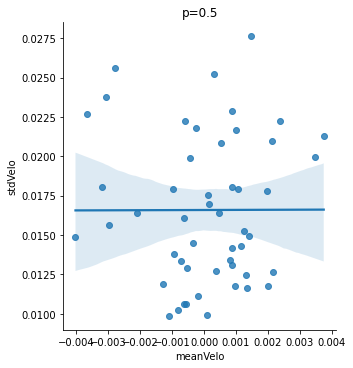

<Figure size 216x288 with 0 Axes>

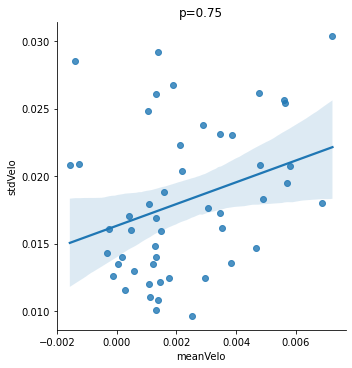

<Figure size 216x288 with 0 Axes>

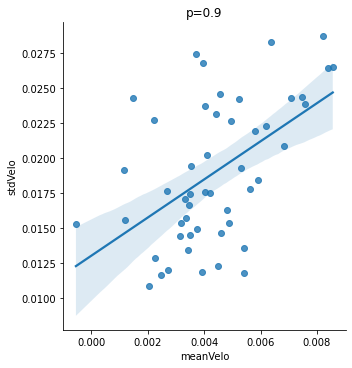

<Figure size 216x288 with 0 Axes>

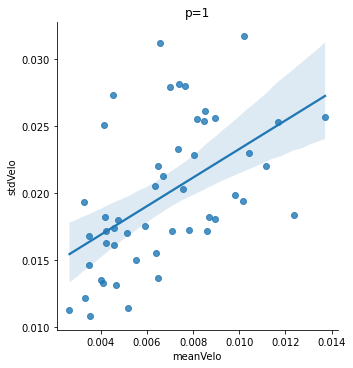

In [185]:
for i, proba in enumerate([0.5, 0.75, 0.9, 1]):
    plt.figure(figsize=(3,4))
    _ = sns.lmplot(data=df[df.proba==proba], x="meanVelo", y="stdVelo")
    plt.title(f'p={proba}')


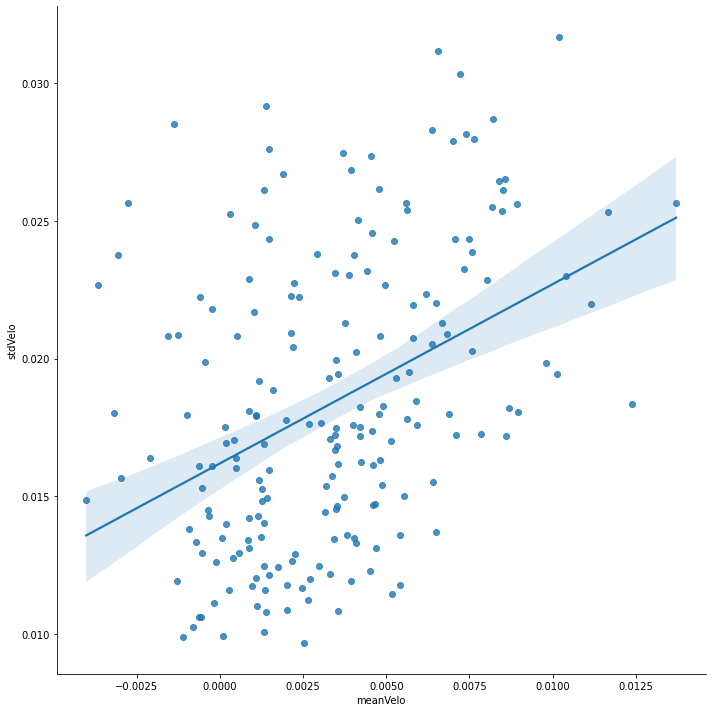

In [176]:
sns.lmplot(data=df,x="meanVelo",y="stdVelo",height=10)

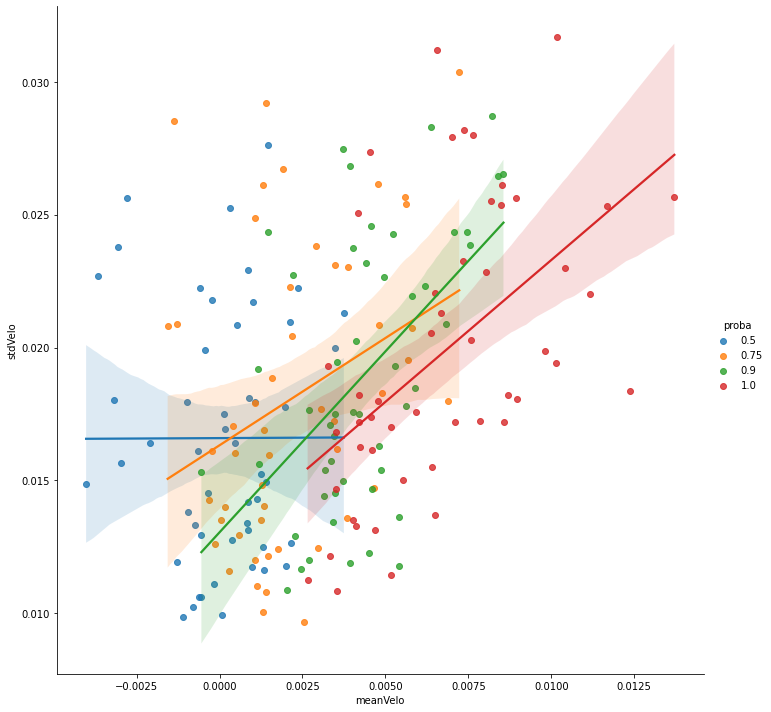

In [177]:
sns.lmplot(data=df,x="meanVelo",y="stdVelo",hue='proba',height=10)
plt.savefig('Integrated-Wiener-process.png', bbox_inches='tight')